#### Test the TM

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
from functions import complex_correlation, colorize, show_colormap_image
import os

# for Jupyter lab
# %matplotlib widget
# for Jupyter notebook
# %matplotlib notebook
%matplotlib inline

data_folder = '../Data/'

SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Check data structures of the pixel-form TM

In [18]:
file_path = os.path.sep.join([data_folder, 'TM5_0.npy'])
part1 = np.load(file_path)
file_path = os.path.sep.join([data_folder, 'TM5_1.npy'])
part2 = np.load(file_path)
TM_ref_pix = np.concatenate([part1, part2], axis = 0)

file_path = os.path.sep.join([data_folder, 'TM52_0.npy'])
part1 = np.load(file_path)
file_path = os.path.sep.join([data_folder, 'TM52_1.npy'])
part2 = np.load(file_path)
TM_perturb_pix = np.concatenate([part1, part2], axis = 0)
del part1
del part2

#### Show pixel-form TM

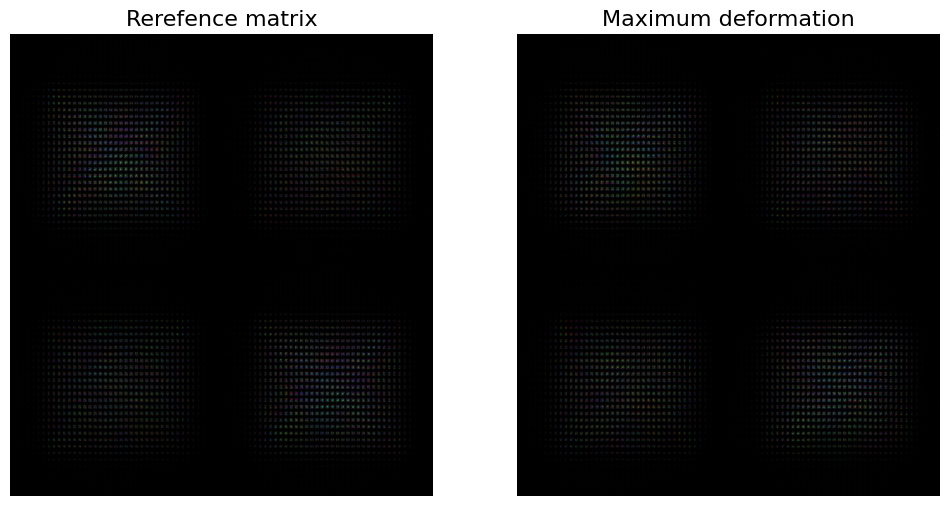

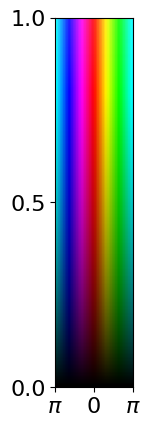

In [19]:
to_img = lambda x: colorize(x, beta = 1., max_threshold = 0.8)

fig ,ax = plt.subplots(1,2, figsize = (12,6))
ax[0].imshow(to_img(TM_ref_pix), aspect = 'auto')
ax[0].axis('off')
ax[0].set_title('Rerefence matrix')
ax[1].imshow(to_img(TM_perturb_pix), aspect = 'auto')
ax[1].axis('off')
ax[1].set_title('Maximum deformation')

# fig.savefig('TMs_pix_complex_deform_full.svg', dpi = 400)

show_colormap_image(to_img, save_name = 'cm_TM_pix.svg')

In [20]:
print('TM_ref_pix shape:', TM_ref_pix.shape)
print('TM_perturb_pix shape:', TM_perturb_pix.shape)
print('Input of single polarization of TM_ref_pix: {0}, and 1-D index value: {1}'.format(int(TM_ref_pix.shape[0]/2), int(np.sqrt(int(TM_ref_pix.shape[0]/2)))))
print('Output of single polarization of TM_ref_pix: {0}, and 1-D index value: {1}'.format(int(TM_ref_pix.shape[1]/2), int(np.sqrt(int(TM_ref_pix.shape[1]/2)))))
print('Data type of TM_ref_pix:', TM_ref_pix.dtype)
print('One value of TM_ref_pix:', TM_ref_pix[10,10])

TM_ref_pix shape: (3362, 2450)
TM_perturb_pix shape: (3362, 2450)
Input of single polarization of TM_ref_pix: 1681, and 1-D index value: 41
Output of single polarization of TM_ref_pix: 1225, and 1-D index value: 35
Data type of TM_ref_pix: complex128
One value of TM_ref_pix: (1.7176983270970154e-08-1.4512554769674468e-07j)


### Check data structure of PIM-TM

In [22]:
TM_modes = []
# Load parameters
file_path = os.path.sep.join([data_folder, 'param.json'])
with open(file_path,'r') as f:
    param = json.load(f)
    print('Succesfully loaded params of no pressure exp from json file')
    
for i, pos in enumerate(param['Translation']['steps_pressure']):
    path = os.path.sep.join([data_folder,f'TM_modes_{str(pos)}.npz'])
    data_dict = np.load(path)
    TM_modes.append(data_dict.f.TM_corr_modes)
TM_modes = np.array(TM_modes)
Nmodes = TM_modes.shape[-1]//2

index_perturbed = 52
index_reference = 5
TM_perturb_mode = TM_modes[index_perturbed]
TM_ref_mode = TM_modes[index_reference]

Succesfully loaded params of no pressure exp from json file


### Show PIM-form TM

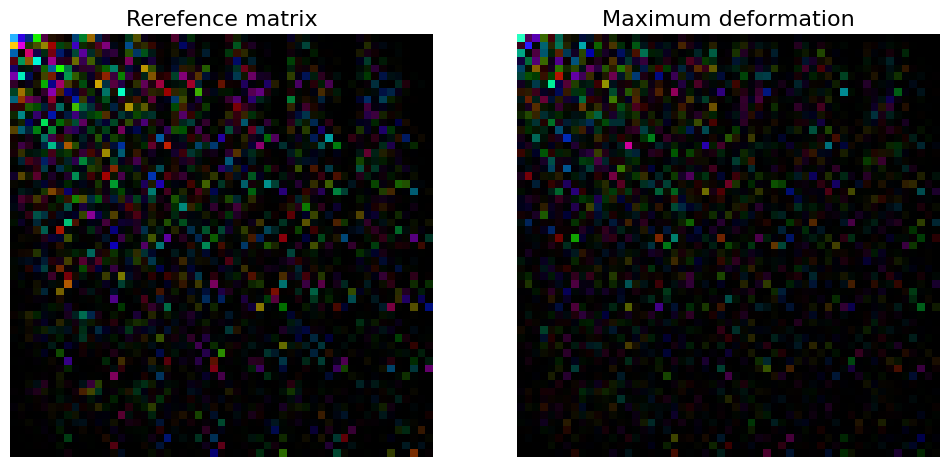

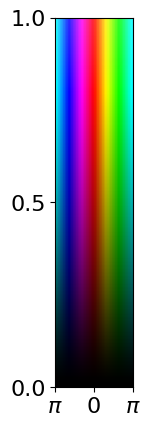

In [24]:
# Calculate the mode basis TMs before correction
TM_ref_mode_before = modes_out_full@TM_ref_pix@modes_in_full.transpose().conjugate()
TM_perturb_mode_before = modes_out_full@TM_perturb_pix@modes_in_full.transpose().conjugate()

to_img = lambda x: colorize(x, beta = 1.4, max_threshold = 0.8)

mode = 'half'

if mode == 'half':
    n_end = Nmodes
elif mode == 'full':
    n_end = 2*Nmodes
    
fig ,ax = plt.subplots(1,2, figsize = (12,6))
ax[0].imshow(to_img(TM_ref_mode_before[:n_end,:n_end]), interpolation = 'None')
ax[0].axis('off')
ax[0].set_title('Rerefence matrix')
ax[1].imshow(to_img(TM_perturb_mode_before[:n_end,:n_end]), interpolation = 'None')
ax[1].axis('off')
ax[1].set_title('Maximum deformation')

# fig.savefig('TMs_mode_complex_deform_full_before.svg', dpi = 'figure')

show_colormap_image(to_img, save_name = 'cm_TM_before.svg')

In [29]:
print('TM_ref_mode_before shape:', TM_ref_mode_before.shape)
print('TM_perturb_mode_before shape:', TM_perturb_mode_before.shape)
print('Input of single polarization of TM_ref_mode_before: {0}'.format(int(TM_ref_mode_before.shape[0]/2)))

TM_ref_mode_before shape: (110, 110)
TM_perturb_mode_before shape: (110, 110)
Input of single polarization of TM_ref_mode_before: 55


### Check data structures of conversion matrix

In [ ]:
path = os.path.sep.join([data_folder,'conversion_matrices.npz'])
data_dict = np.load(path)
modes_in = data_dict.f.modes_in
# create mode matrix for two polarizations
modes_in_full = np.kron(np.array([[1,0],[0,1]]),modes_in)
# number of input pixels
m = int(np.sqrt(modes_in.shape[1]))
modes_out = data_dict.f.modes_out
modes_out_full = np.kron(np.array([[1,0],[0,1]]),modes_out)
# number of output pixels
n = int(np.sqrt(modes_out.shape[1]))

In [ ]:
print('Modes_in shape:', modes_in.shape)
print('Modes_out shape:', modes_out.shape)

Modes_in shape: (55, 1225)
Modes_out shape: (55, 1681)


### Visualize the conversion matrix

#### As 2D image

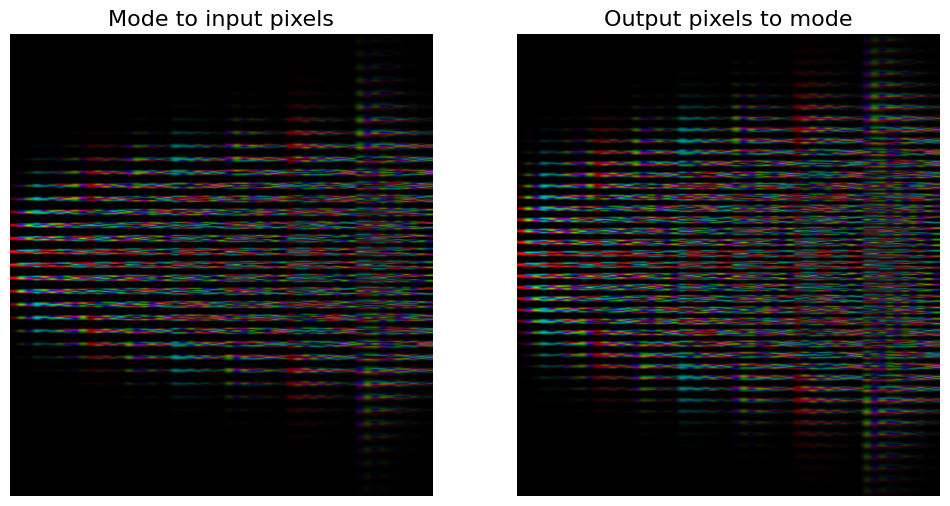

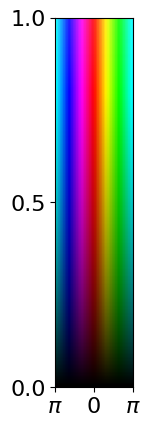

In [31]:
to_img = lambda x: colorize(x, beta = 1., max_threshold = 0.8)

fig ,ax = plt.subplots(1,2, figsize = (12,6))
ax[0].imshow(to_img(modes_in), aspect = 'auto')
ax[0].axis('off')
ax[0].set_title('Mode to input pixels')
ax[1].imshow(to_img(modes_out), aspect = 'auto')
ax[1].axis('off')
ax[1].set_title('Output pixels to mode')

# fig.savefig('TMs_pix_complex_deform_full.svg', dpi = 400)

show_colormap_image(to_img, save_name = 'cm_mode_pix.svg')

#### As modes

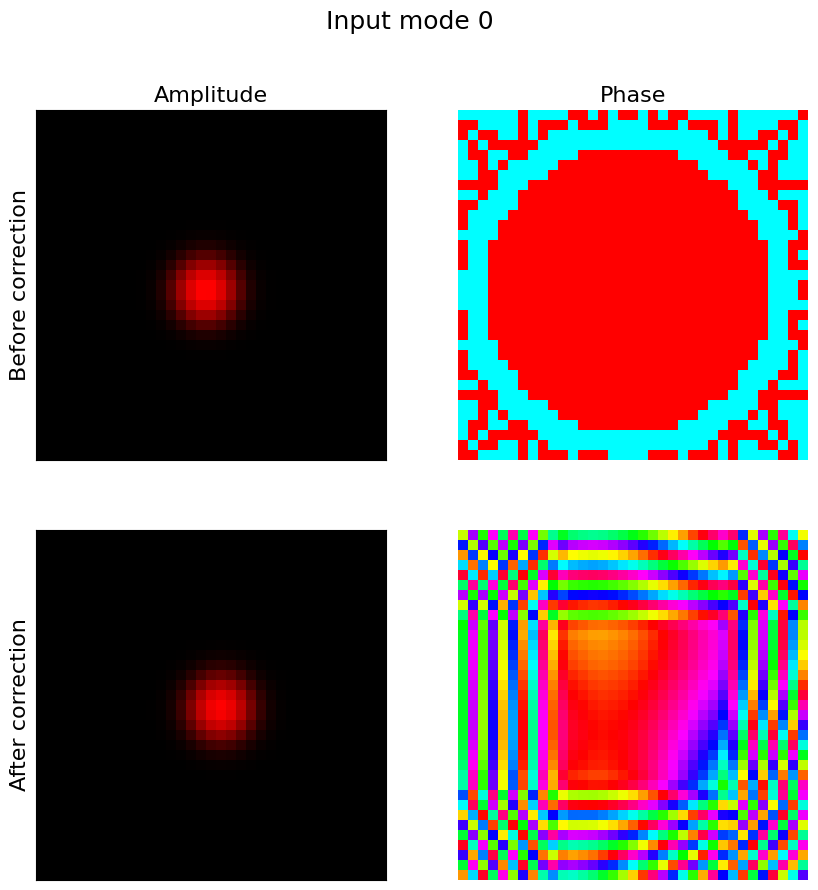

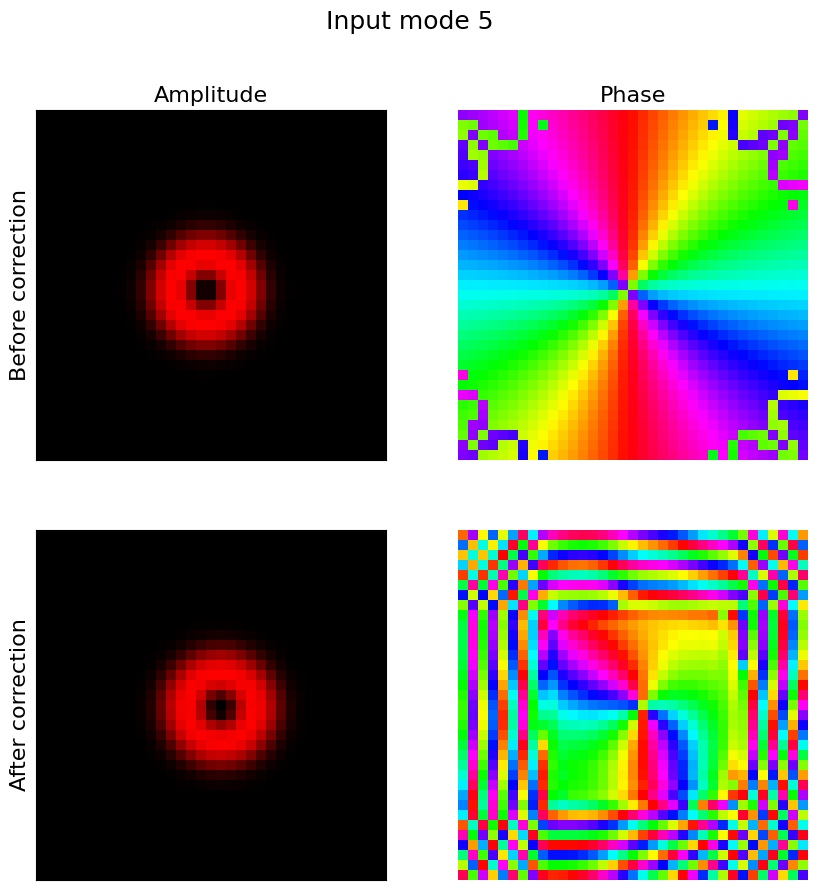

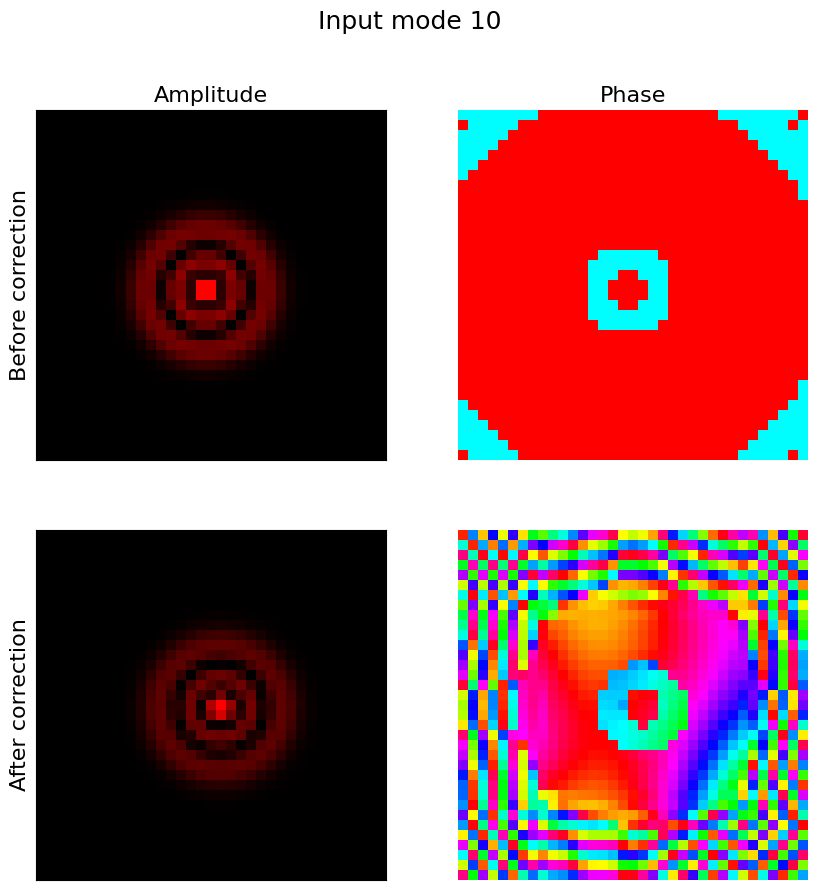

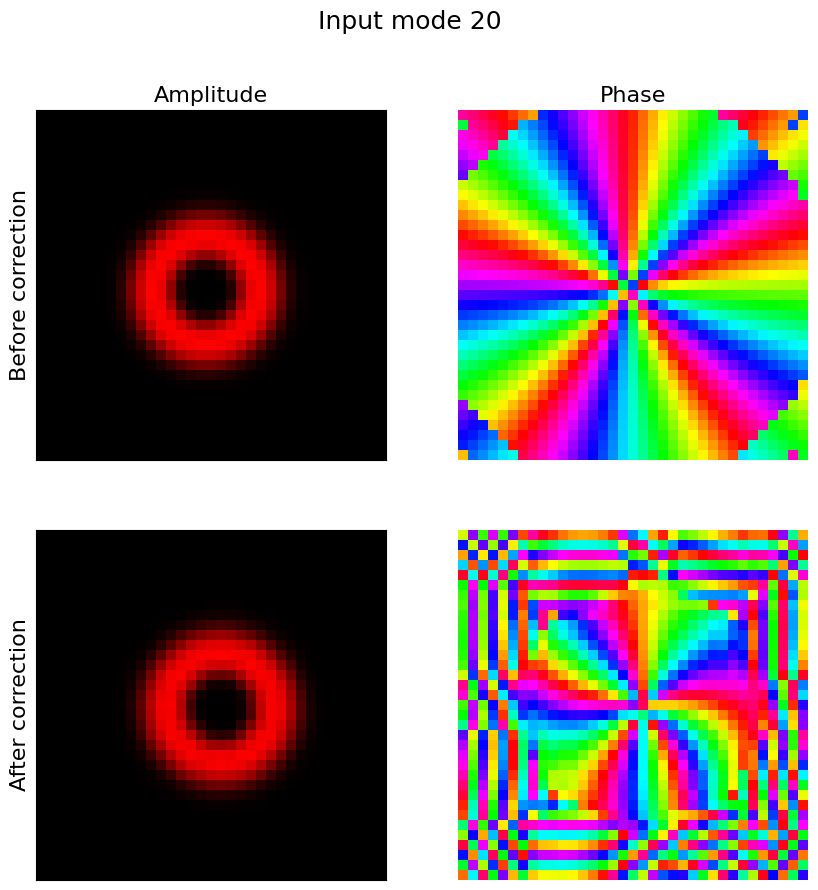

In [ ]:
modes_to_show = [0, 3, 5, 10, 20, 21]
to_img = lambda x: colorize(x, beta = 1.5, max_threshold = 1.)
# to_img = lambda x: np.abs(x)**2
to_2D = lambda x,n: x.reshape([n]*2)
cmap = 'gray'

# Correct the phase and amplitude of the modes
path = os.path.sep.join([data_folder,'modes_in_after_correction.npy'])
modes_in_after = np.load(path)

for ind in modes_to_show:
    Mode_before = np.fliplr(to_2D(modes_in[ind],m))
    Mode_after = to_2D(modes_in_after[ind],m)
    # set the phase to be equal close to the center for axisymmetric modes or shifted for other ones
    if np.abs(Mode_before[m//2,m//2]) > .9*np.max(np.abs(Mode_before)):
        shift = 0
    else:
        shift = 3
    Mode_after *= np.exp(1j*(np.angle(Mode_before[m//2+shift,m//2])-np.angle(Mode_after[m//2+shift,m//2]))) 

    fig ,ax = plt.subplots(2,2, figsize = (10,10))
    ax[0][0].imshow(to_img(np.abs(Mode_before)))
    ax[0][0].set_title('Amplitude')
    ax[0][0].set_ylabel('Before correction')
    ax[0][0].set_xticks([]); ax[0][0].set_yticks([]); 
    ax[0][1].imshow(to_img(np.exp(1j*np.angle(Mode_before))))
    ax[0][1].axis('off')
    ax[0][1].set_title('Phase')
    ax[1][0].imshow(to_img(np.abs(Mode_after)))
    ax[1][0].set_ylabel('After correction')
    ax[1][0].set_xticks([]); ax[1][0].set_yticks([]);
    ax[1][1].imshow(to_img(np.exp(1j*np.angle(Mode_after))))
    ax[1][1].axis('off')

    fig.suptitle(f'Input mode {ind}')
#     fig.savefig(f'mode_in_{ind}.svg', dpi = 400)